## Step-1: Import Libraires

In [22]:
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import joblib

print('>>> Setup complete <<<')

>>> Setup complete <<<


## Step-2: Load the dataset

In [2]:
filepath = "Student_Performance.csv"
try:
    df = pd.read_csv(filepath)
except Exception as e:
    print("Error:", e)

df = pd.read_csv(filepath)
df.sample(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
8255,5,98,Yes,6,3,81.0
1823,3,52,No,4,7,32.0
4908,6,90,Yes,7,8,80.0
4003,3,57,Yes,7,2,39.0
8084,9,73,Yes,4,5,68.0


## Step-3: Explore and Understand Dataset

In [3]:
print(df.columns)
print(df.columns.tolist())
print("--------------------------")
nRow, nCol = df.shape
print(f"There are {nRow} rows and {nCol} columns")
print("Rows x Columns:", df.size)
print("--------------------------")
print("Info about dataset:")
df.info()

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')
['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']
--------------------------
There are 10000 rows and 6 columns
Rows x Columns: 60000
--------------------------
Info about dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Pe

In [4]:
# df.describe()
df.describe(include="all")

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2,NaN,NaN,NaN
top,NaN,NaN,No,NaN,NaN,NaN
freq,NaN,NaN,5052,NaN,NaN,NaN
mean,4.992900,69.445700,NaN,6.530600,4.583300,55.224800
std,2.589309,17.343152,NaN,1.695863,2.867348,19.212558
min,1.000000,40.000000,NaN,4.000000,0.000000,10.000000
25%,3.000000,54.000000,NaN,5.000000,2.000000,40.000000
50%,5.000000,69.000000,NaN,7.000000,5.000000,55.000000
75%,7.000000,85.000000,NaN,8.000000,7.000000,71.000000


In [5]:
for col in df.columns:
    if type(df[col][0]) is str:
        print(col,df[col].unique())

print(df['Extracurricular Activities'].unique())

Extracurricular Activities ['Yes' 'No']
['Yes' 'No']


## Step-4: Handle Missing Values (if any exist)

In [6]:
# To count NaN or missing values per column
missing_per_column = df.isna().sum()
print("\nMissing values per column:\n", missing_per_column)
# Count the number of NaN values in the entire DataFrame
missing_values = df.isna().sum().sum()
print("\nTotal number of missing values in the DataFrame:", missing_values)


Missing values per column:
 Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

Total number of missing values in the DataFrame: 0


## Step-5: Mapping

In [7]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].str.strip().str.capitalize()
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({"Yes": 1, "No": 0})
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


## Step-6: Separate features (X) and target (y)

In [8]:
y = df['Performance Index'].values
X = df.drop('Performance Index', axis=1)
X.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5


We are not doing Feature Scaling for now

## Step-7: Data Splitting
- from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=0)

## Step-9: Linear Regression Model (Create->Fit->Predict)
- from sklearn.linear_model import LinearRegression 
- from sklearn.metrics import mean_squared_error, r2_score

In [15]:
"""9.1) Creating a Model"""
#Create the object of the class
regressor = LinearRegression()

In [16]:
"""9.2) Fitting a Model"""
regressor.fit(X_train,y_train)

LinearRegression()

In [17]:
"""9.3) Making Predictions"""
y_pred = regressor.predict(X_test)
y_pred

array([50.45128503, 53.09379171, 78.24502652, ..., 64.56863194,
       25.89718776, 18.82598463])

## Step-10: Compare Predictions vs Actuals

In [18]:
print(pd.DataFrame(zip(y_pred,y_test)))

              0     1
0     50.451285  53.0
1     53.093792  50.0
2     78.245027  80.0
3     25.391788  24.0
4     67.400668  64.0
...         ...   ...
1995  90.699627  91.0
1996  41.720462  42.0
1997  64.568632  66.0
1998  25.897188  27.0
1999  18.825985  21.0

[2000 rows x 2 columns]


## Step-10: Evaluate the Model's Performance
- from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [19]:
print("MAE:", mean_absolute_error(y_test,y_pred))
print("MSE:", mean_squared_error(y_test,y_pred))
print("R^2 Score:", r2_score(y_test,y_pred))

MAE: 1.6229708329710875
MSE: 4.105609215835831
R^2 Score: 0.9880686410711422


## Step-11: Visualization

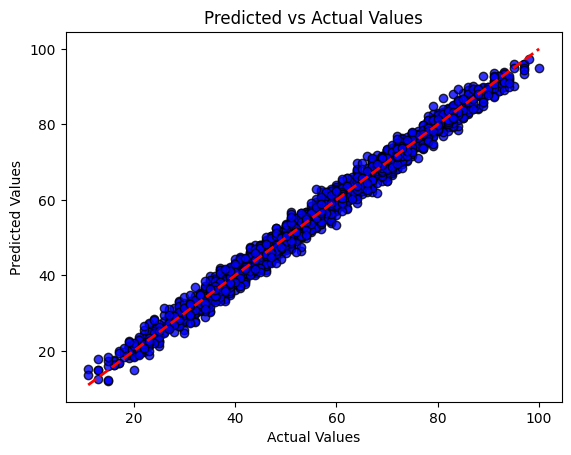

In [20]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.8, edgecolors='black')

# Plot the diagonal line (Perfect predictions line)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Fit') #r-- is red dashed line

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()

## Step-12: Save the Model
- import joblib

In [23]:
joblib.dump(regressor, 'regression_model.pkl')

['regression_model.pkl']